In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from numpy.linalg import eig

* **1.Load "diabetes" datasets from SKlearn and do the PCA for n=3, and plot the data.** 

In [3]:
#Load the dataset
data = datasets.load_diabetes(as_frame=True)

In [4]:
data.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [5]:
df = pd.DataFrame(data=data.data, columns=data.feature_names)

In [6]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


In [27]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01


In [28]:
df.isnull().sum()

age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
#Standardize the dataset
scaler = StandardScaler()
scaler.fit(df)

StandardScaler()

In [10]:
scaled_df = scaler.transform(df)

In [11]:
from sklearn.decomposition import PCA

In [12]:
#Do the PCA with n = 3
pca = PCA (n_components=3)

In [13]:
pca.fit(scaled_df)

PCA(n_components=3)

In [14]:
pca_df = pca.fit_transform(scaled_df)

In [15]:
pca_df

array([[ 0.58719913, -1.9468322 ,  0.58920548],
       [-2.83162538,  1.37208173,  0.02792987],
       [ 0.27212855, -1.63490124,  0.73924374],
       ...,
       [-0.20520638, -1.20548723,  0.4961862 ],
       [ 0.69287112,  0.2101271 , -0.86872416],
       [-1.90394067,  3.97577657, -0.04833791]])

In [16]:
#Check the shape of the dataset after PCA dimension reduction, comparing with the original dataset
pca_df.shape

(442, 3)

In [17]:
scaled_df.shape

(442, 10)

The new number of features is now 3 instead of 10.

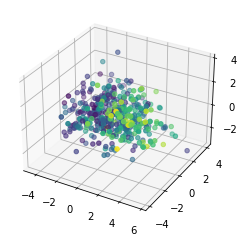

In [18]:
#Plot the dataset after PCA
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(pca_df[:,0], pca_df[:,1], pca_df[:,2], c = data['target'])
plt.show()

* **2. What is the variance (%) covered by first 3 components?  How is this percentage of variance computed?**

In [19]:
#Calculate the covariance matrix
cov_matrix = np.cov(scaled_df.T)

In [20]:
#Extract eigenvalues and eigenvectors
eigenvalues, eigenvectors = eig(cov_matrix)

In [21]:
#Calculate the percentage of the first 3 components
total_values = sum(eigenvalues)

var_percentage = [(e/total_values)*100 for e in sorted(eigenvalues, reverse=True)]
print(var_percentage)

[40.24210750152787, 14.92319677598696, 12.05966259124999, 9.554764032641142, 6.621813912661731, 6.027170756201264, 5.365656523193783, 4.336820363655837, 0.7832002446108975, 0.0856072982705318]


In [1]:
percentage_3_components = 0
for i in range(3):
    percentage_3_components += round(var_percentage[i],2)
print('The first 3 components would contribute {}% of the dataset'.format(percentage_3_components ))

NameError: name 'var_percentage' is not defined

* **3.Is there any correlation between these three components?**

Coefficient correlation matrix between PC1 and PC2:  [[ 1.00000000e+00 -2.44765944e-16]
 [-2.44765944e-16  1.00000000e+00]]


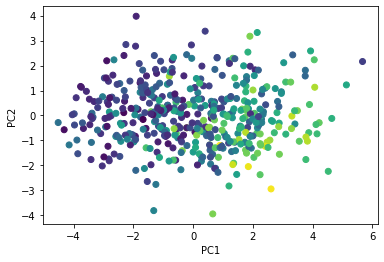

In [23]:
from sklearn.decomposition import PCA

corr_pc1_pc2 = np.corrcoef(pca_df[:,0], pca_df[:,1])
print('Coefficient correlation matrix between PC1 and PC2: ', corr_pc1_pc2)

plt.scatter(pca_df[:,0], pca_df[:,1], c = data['target'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


The coefficient correlation between PC1 and PC2 is very small, therefore there is no correlation.

Coefficient correlation matrix between PC1 and PC3:  [[ 1.00000000e+00 -5.87429669e-16]
 [-5.87429669e-16  1.00000000e+00]]


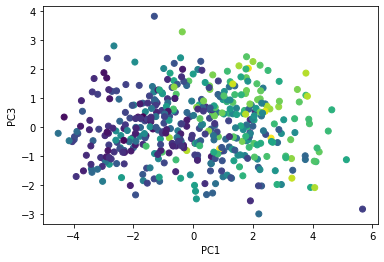

In [24]:
corr_pc1_pc3 = np.corrcoef(pca_df[:,0], pca_df[:,2])
print('Coefficient correlation matrix between PC1 and PC3: ', corr_pc1_pc3)

plt.scatter(pca_df[:,0], pca_df[:,2],c = data['target'])
plt.xlabel('PC1')
plt.ylabel('PC3')
plt.show()

The coefficient correlation between PC1 and PC3 is very small, therefore there is no correlation.

Coefficient correlation matrix between PC2 and PC3:  [[1.00000000e+00 2.87594559e-16]
 [2.87594559e-16 1.00000000e+00]]


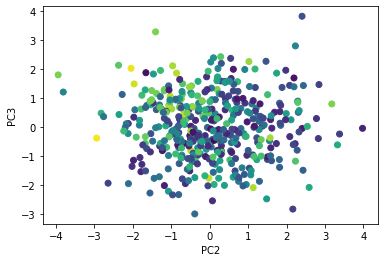

In [25]:
corr_pc2_pc3 = np.corrcoef(pca_df[:,1], pca_df[:,2])
print('Coefficient correlation matrix between PC2 and PC3: ', corr_pc2_pc3)

plt.scatter(pca_df[:,1], pca_df[:,2],c = data['target'])
plt.xlabel('PC2')
plt.ylabel('PC3')
plt.show()

The coefficient correlation between PC2 and PC3 is very small, therefore there is no correlation.